# NGC 5533 (UGC 9133)

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
import scipy.interpolate as inter

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N5533'
gtype = 'SA(rs)ab'  #TODO: откуда
incl = 53.  #adopted by N08, в LEDA 60.3
scale = 0.265 #kpc/arcsec

data_path = '../../data/ngc5533'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

In [7]:
# TODO: add

## Разное

In [8]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+5533&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [9]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc5533 width=1000 height=350></iframe>')

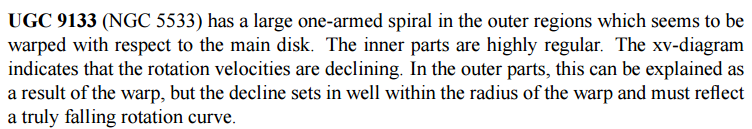

In [10]:
os.chdir(data_path)
Image('noordermeer_data/n5533_cite_p41.png')

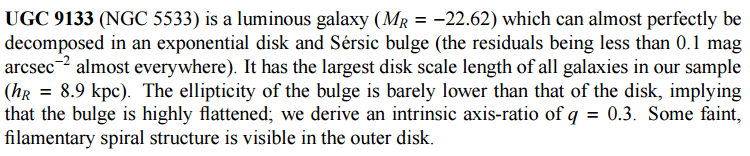

In [11]:
Image('noordermeer_data/n5533_cite_p110.png')

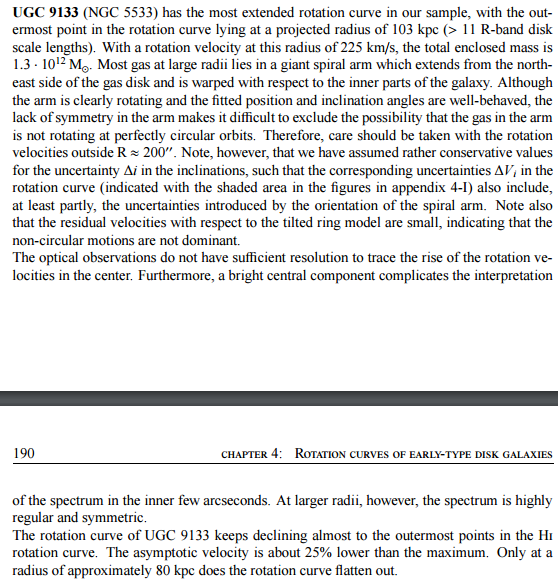

In [12]:
Image('noordermeer_data/n5533_cite_pp189_190.png')

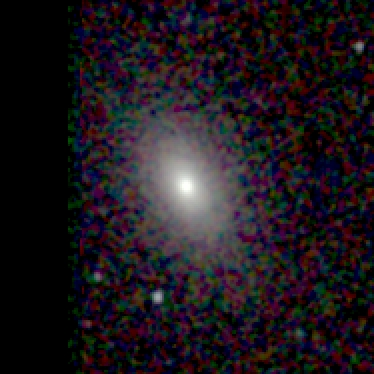

In [13]:
# 2MASS
Image('ngc5533_JHK.jpg')

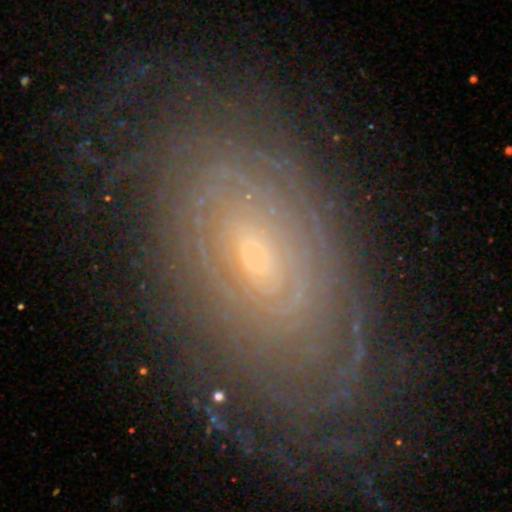

In [14]:
#SDSS
Image('ngc5533_SDSS.jpeg')

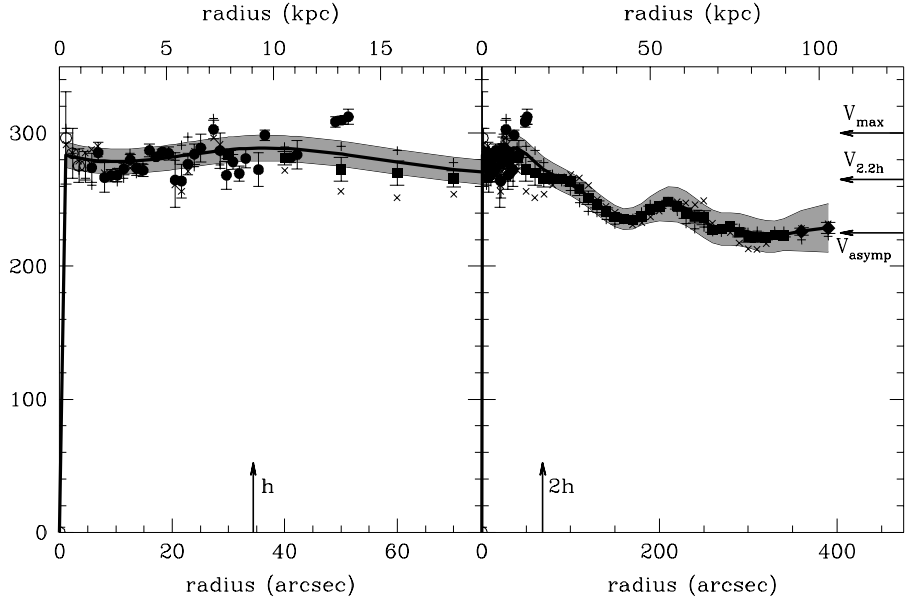

In [15]:
Image('noordermeer_data/n5533_rc.png')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


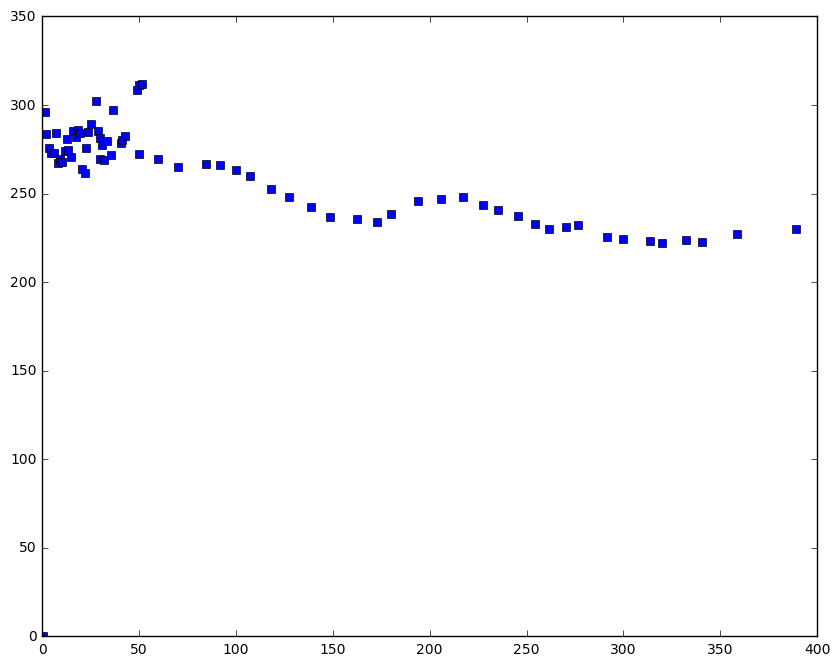

In [16]:
r, vel = zip(*np.loadtxt("noordermeer_data/n5533_rc_noorderm.dat", float, delimiter=','))

fig = plt.figure(figsize=[10,8])
plt.plot(r, vel, 's')
plt.legend()
plt.show()

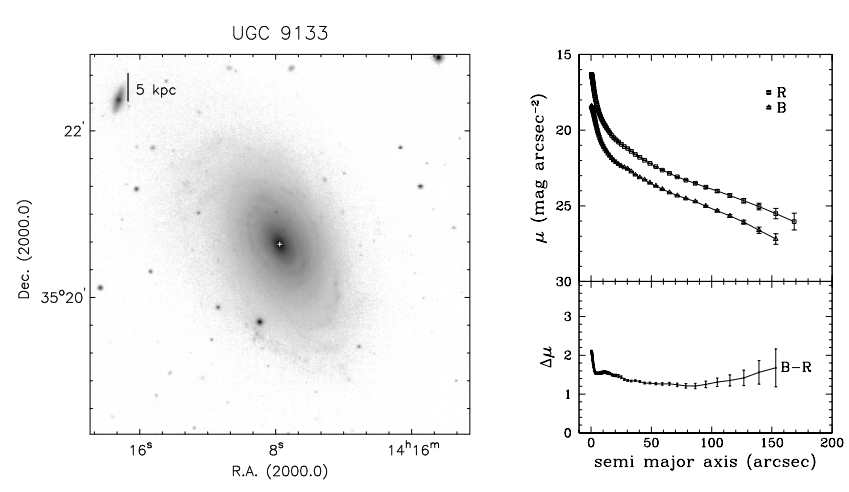

In [17]:
Image('noordermeer_data/n5533_photom.png')

## Кинематические данные по звездам

* Noordermeer 2008 https://ui.adsabs.harvard.edu/#abs/2008MNRAS.388.1381N/abstract

TODO: проверить данные и добавить ссылки, поисктаь еще

* http://adsabs.harvard.edu/cgi-bin/bib_query?2006ApJ...636..721B - кривая вращения до 80
* https://arxiv.org/pdf/1103.4928v1.pdf - 9133 

TODO: добавить данные

### Кривая вращения

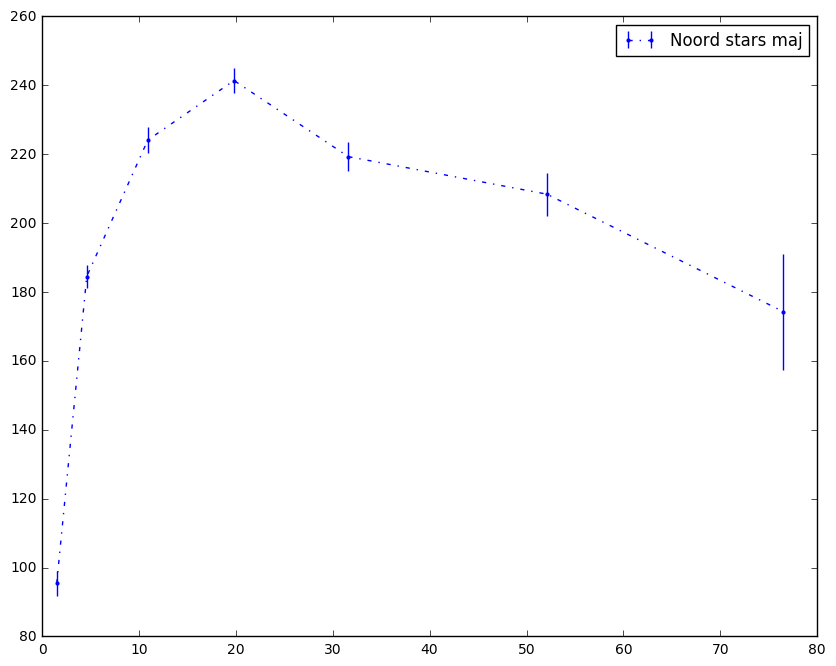

In [18]:
# Данные по звездной кинематике Noordermeer вдоль большей полуоси (исправленные за наклон?)
r_ma, vel_ma, e_vel_ma = zip(*np.loadtxt("v_stars_noord.dat", float))

fig = plt.figure(figsize=[10,8])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='-.', marker='.', mew=0, label="Noord stars maj")
plt.legend()
plt.show()

In [19]:
r_ma = [0.0] + list(r_ma)
vel_ma = [0.0] + list(vel_ma)
e_vel_ma = [1.0] + list(e_vel_ma)

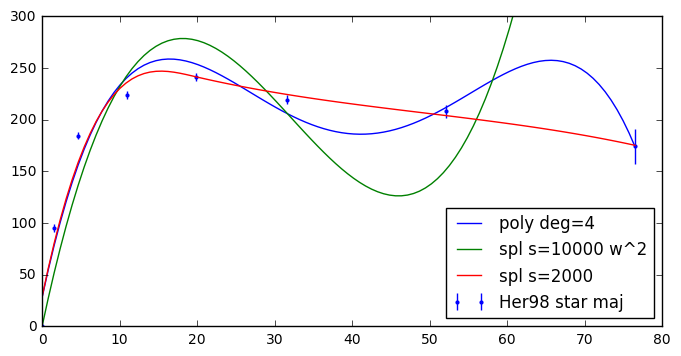

In [20]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma, vel_ma, yerr=e_vel_ma, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma), 100)

poly_star = poly1d(polyfit(r_ma, vel_ma, deg=4))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=4')

def w(arr):
    return map(lambda l: 1/(l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma, vel_ma, k=3, s=10000., w=w(e_vel_ma))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma, vel_ma, k=3, s=2000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=2000')

plt.legend(loc='lower right')
plt.ylim(0, 300)
plt.show()

In [21]:
star_approx = spl

### Дисперсии

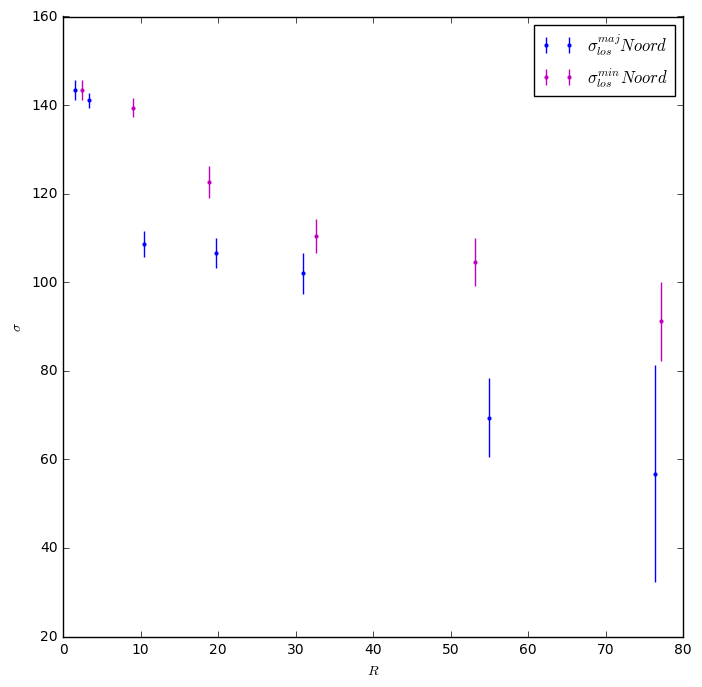

In [22]:
# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos_i

r_sig_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("s_stars_maN.dat", float))
r_sig_mi, sig_mi, e_sig_mi = zip(*np.loadtxt("s_stars_miN.dat", float))

fig = plt.figure(figsize=[8, 8])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$\sigma_{los}^{maj} Noord$')
r_sig_mi = map(correct_min, r_sig_mi)
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='m', label='$\sigma_{los}^{min} Noord$')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.show()

In [23]:
spl_min = inter.UnivariateSpline(r_sig_mi, sig_mi, k=3, s=100.)
sig_min_lim = max(r_sig_mi)

spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=100.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_sig_ma)+15., 100)

In [24]:
@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

@flat_end(sig_min_lim)
def sig_R_minor_minmin(r, spl_min=spl_min):
    return spl_min(r).item()

@flat_end(sig_min_lim)
def sig_R_minor_min(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_min_lim)
def sig_R_minor_max(r, spl_min=spl_min):
    return spl_min(r).item()/sqrt(sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_min_lim)
def sig_R_minor_maxmax(r, spl_min=spl_min):
    return spl_min(r)/sin_i

Для малой оси:

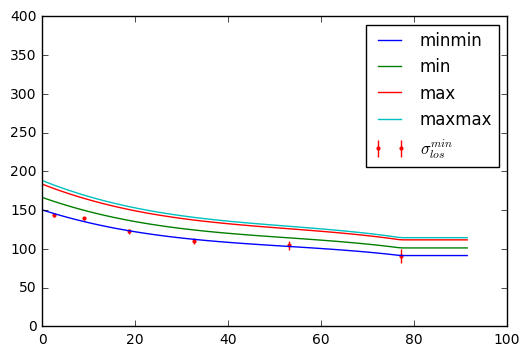

In [25]:
plt.errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')

plt.plot(points, map(sig_R_minor_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_minor_min, points), label = 'min')
plt.plot(points, map(sig_R_minor_max, points), label = 'max')
plt.plot(points, map(sig_R_minor_maxmax, points), label = 'maxmax')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

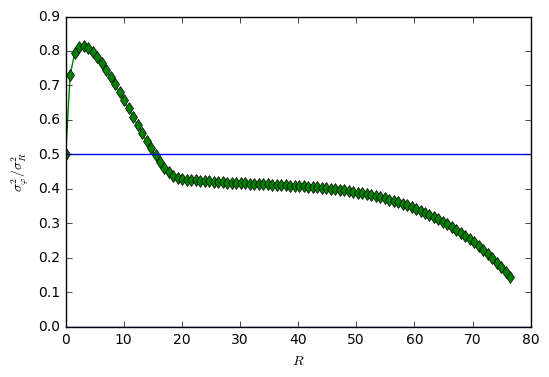

In [26]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0)
plt.show()

По большой:

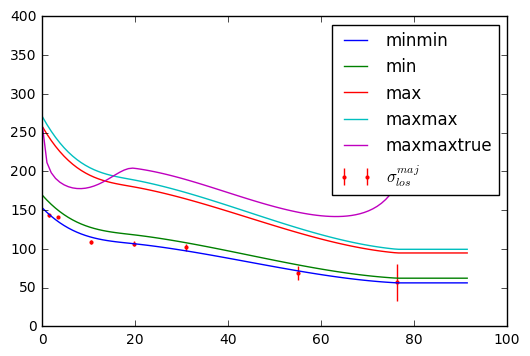

In [27]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100)
plt.show()

Сравним major vs minor оценки:

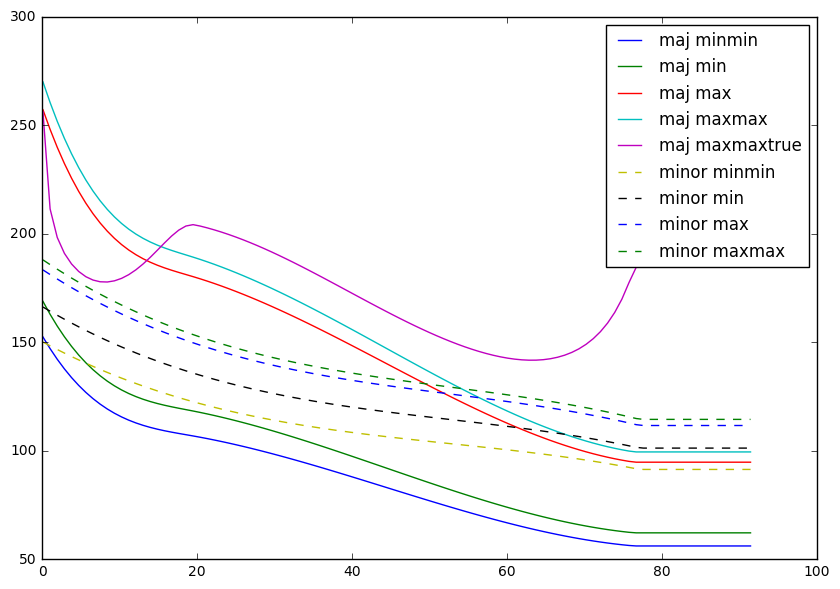

In [28]:
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(points, map(sig_R_minor_minmin, points), '--', label = 'minor minmin')
plt.plot(points, map(sig_R_minor_min, points), '--', label = 'minor min')
plt.plot(points, map(sig_R_minor_max, points), '--', label = 'minor max')
plt.plot(points, map(sig_R_minor_maxmax, points), '--', label = 'minor maxmax')

plt.legend()
plt.ylim(50,300)
plt.xlim(0,100)
plt.show()

Видно, что оценки из разных осей не согласуются друг с другом.

## Данные по газу

TODO: поискать еще данные и добавить статьи

* Silchenko https://ui.adsabs.harvard.edu/#abs/1998NewA....3...15S/abstract

TODO: добавить
* https://arxiv.org/pdf/1207.2729v1.pdf - HI кривая вращения
* https://arxiv.org/pdf/astro-ph/0703352v1.pdf - HI (WSRT)

### Кривая вращения

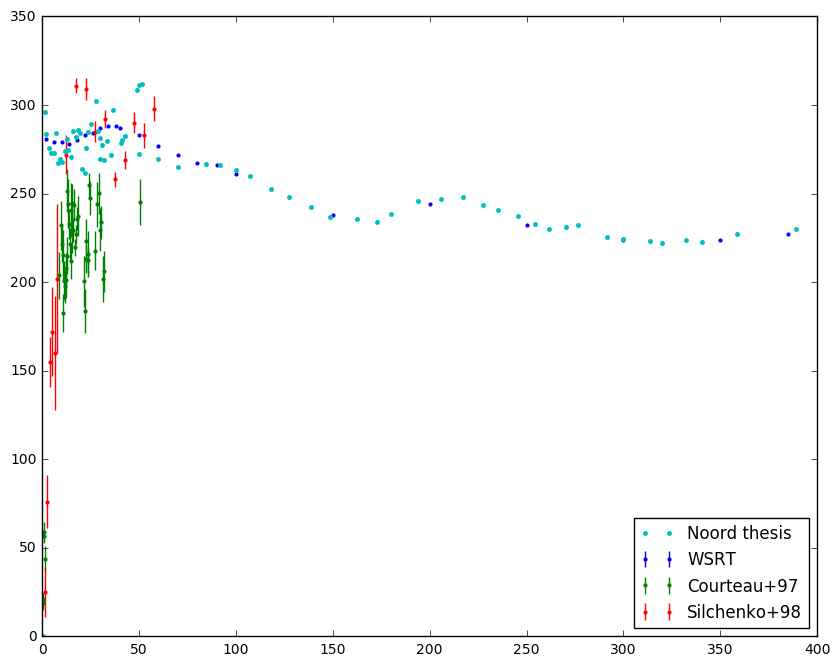

In [29]:
fig = plt.figure(figsize=[10,8])

# TODO: проверить как сняты данные
# Noordermeer+2007 ionized gas + HI (скорректированно за наклон)
r_wsrt, vel_wsrt, e_vel_wsrt = zip(*np.loadtxt("v_gas_WSRT.dat", float))

# Courteau97 ionized gas (не скорректированно за наклон!)
r_c, vel_c, e_vel_c = zip(*np.loadtxt("v_gas_Court.dat", float))
r_c, vel_c, e_vel_c = zip(*sorted(zip(np.abs(r_c), np.abs(vel_c), e_vel_c)))

# Sil'chenko O.K., Burenkov, A.N., Vlasyuk V.V., 1998 NewA 3, 15(не скорректированно за наклон!)
r_s, vel_s, e_vel_s = zip(*np.loadtxt("v_gas_SBV.dat", float))

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_c, vel_c, yerr=e_vel_c, fmt='.', marker='.', mew=0, label = 'Courteau+97')
plt.errorbar(r_s, vel_s, yerr=e_vel_s, fmt='.', marker='.', mew=0, label = 'Silchenko+98')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 350)
plt.legend(loc='lower right')
plt.show()

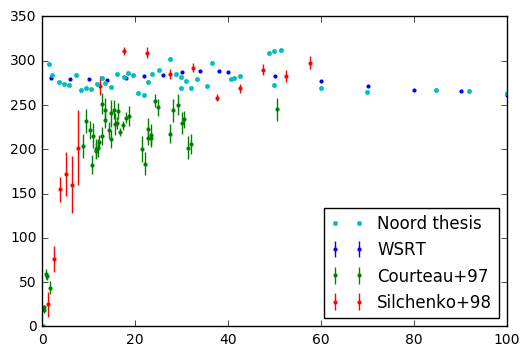

In [30]:
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_c, vel_c, yerr=e_vel_c, fmt='.', marker='.', mew=0, label = 'Courteau+97')
plt.errorbar(r_s, vel_s, yerr=e_vel_s, fmt='.', marker='.', mew=0, label = 'Silchenko+98')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(loc='lower right')
plt.show()

Не согласуется - данные Сильченко накладываются на Ноордермеера, при этом они якобы не скорректированы за наклон, а Ноордермеер скорректирован. При этом данные Courteau действительно лучше скорректировать:

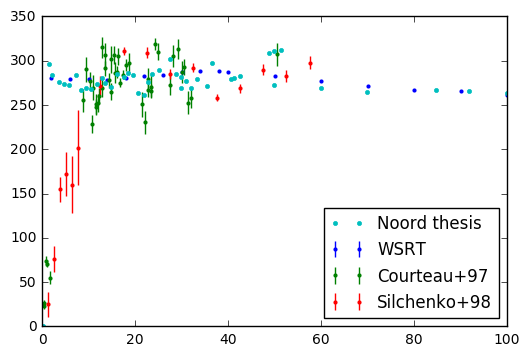

In [31]:
plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.errorbar(r_c, map(lambda l: l/sin_i, vel_c), yerr=e_vel_c, fmt='.', marker='.', mew=0, label = 'Courteau+97')
plt.errorbar(r_s, vel_s, yerr=e_vel_s, fmt='.', marker='.', mew=0, label = 'Silchenko+98')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 350)
plt.xlim(0, 100)
plt.legend(loc='lower right')
plt.show()

Ну и что делать в центре - тоже не очень понятно. Приблизим как есть:

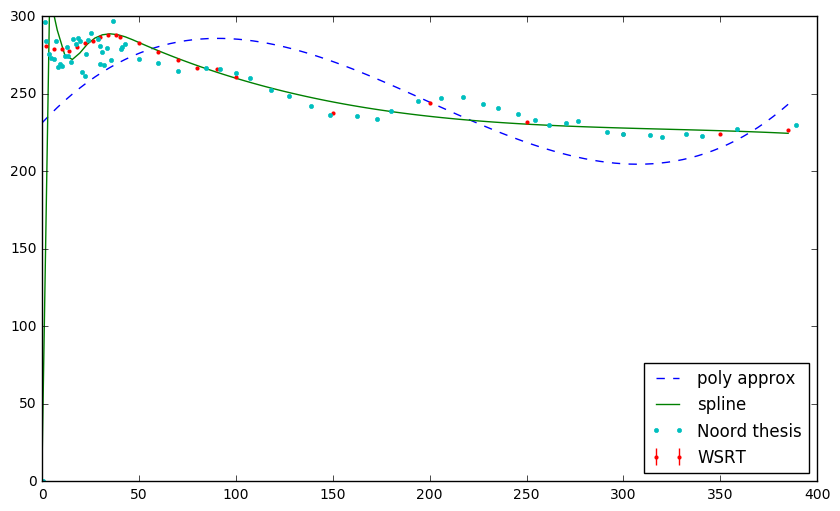

In [32]:
fig = plt.figure(figsize=[10,6])

gas_approx = poly1d(polyfit(r_wsrt, vel_wsrt, deg=3))
test_points = np.linspace(min(r_wsrt), max(r_wsrt), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(r_wsrt, vel_wsrt, k=3, s=2400.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
plt.plot(r, vel, '.', label = 'Noord thesis')
plt.ylim(0, 300)
plt.legend(loc='lower right')
plt.show()

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

utils.ipynb:4: RuntimeWarning: divide by zero encountered in double_scalars
utils.ipynb:6: RuntimeWarning: divide by zero encountered in double_scalars


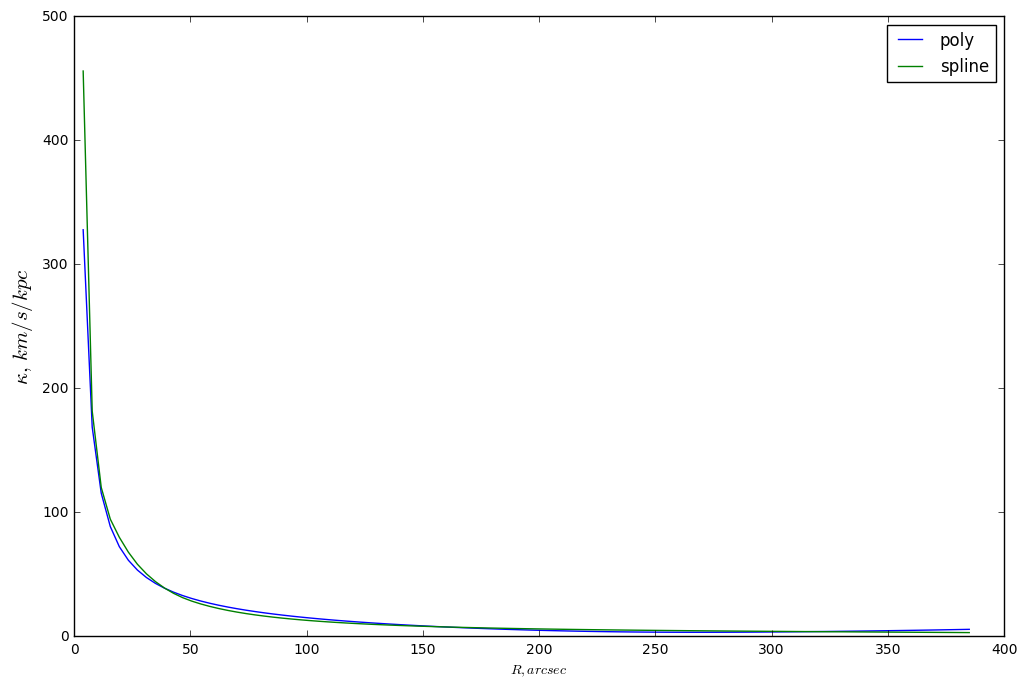

In [33]:
fig = plt.figure(figsize=[12, 8])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 500)
plt.legend()
plt.show()

Удивительно гладко даже для такой точности аппроксимации.

### Поверхностная плотность газа 

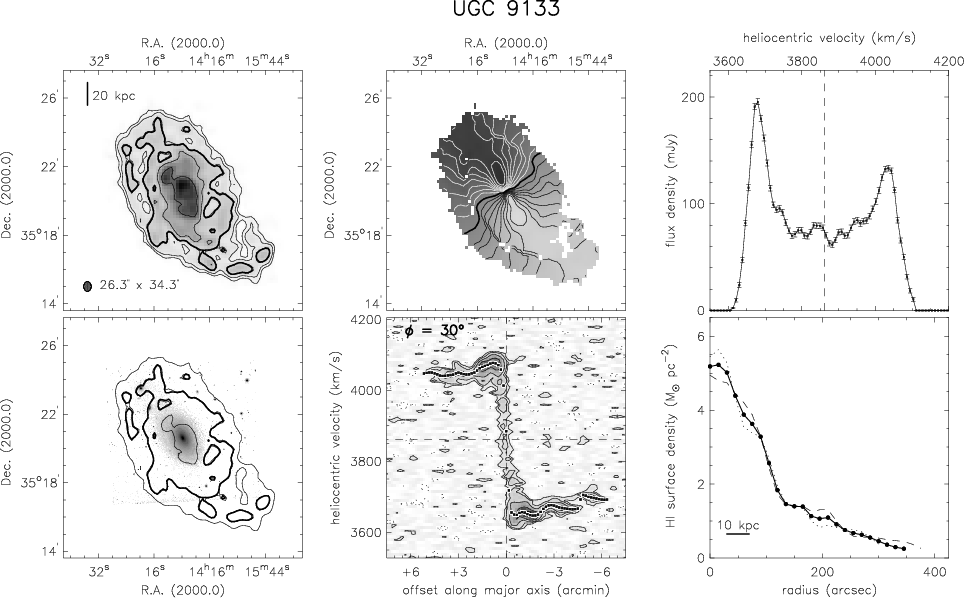

In [34]:
Image('ugc9133.png')

Плотность HI:

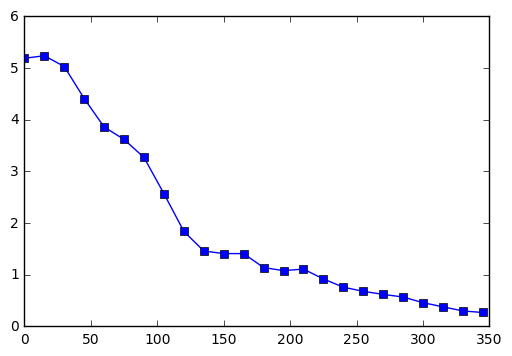

In [35]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_density.dat", float))

plt.plot(r_g_dens, gas_dens, 's-')
plt.show()

TODO: поискать еще данных, в том числе по молекулярке

## Данные по фотометрии

Диплом: B, R ~ 150; макс диск 330 (M/L=5); J ~ 750

* Noordermeer 2007 https://ui.adsabs.harvard.edu/#abs/2007MNRAS.376.1480N/abstract
* Méndez-Abreu https://ui.adsabs.harvard.edu/#abs/2008A&A...478..353M/abstract в $J$
* http://adsabs.harvard.edu/cgi-bin/bib_query?1996ApJS..103..363C - $r$ полоса, старое
* http://adsabs.harvard.edu/cgi-bin/bib_query?1991A%26AS...91..469B - $R$, есть профиль, старое
* http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B - видимо $V$, данные в таблице онлайн
* http://iopscience.iop.org/article/10.1086/300490/pdf - M/L указано как 3.1
* https://arxiv.org/pdf/astro-ph/9704274v1.pdf - 6.8 в $В$ для максимального диска
* CALIFA http://adsabs.harvard.edu/abs/2016arXiv161005324M $g$, $r$, $i$

* Silchenko https://ui.adsabs.harvard.edu/#abs/1998NewA....3...15S/abstract - есть V и R_c (доступ через Sci-Hub, есть профиль)


* https://arxiv.org/pdf/1501.06826v1.pdf есть оценки M/L в V и в 3.6


In [36]:
all_photometry = []

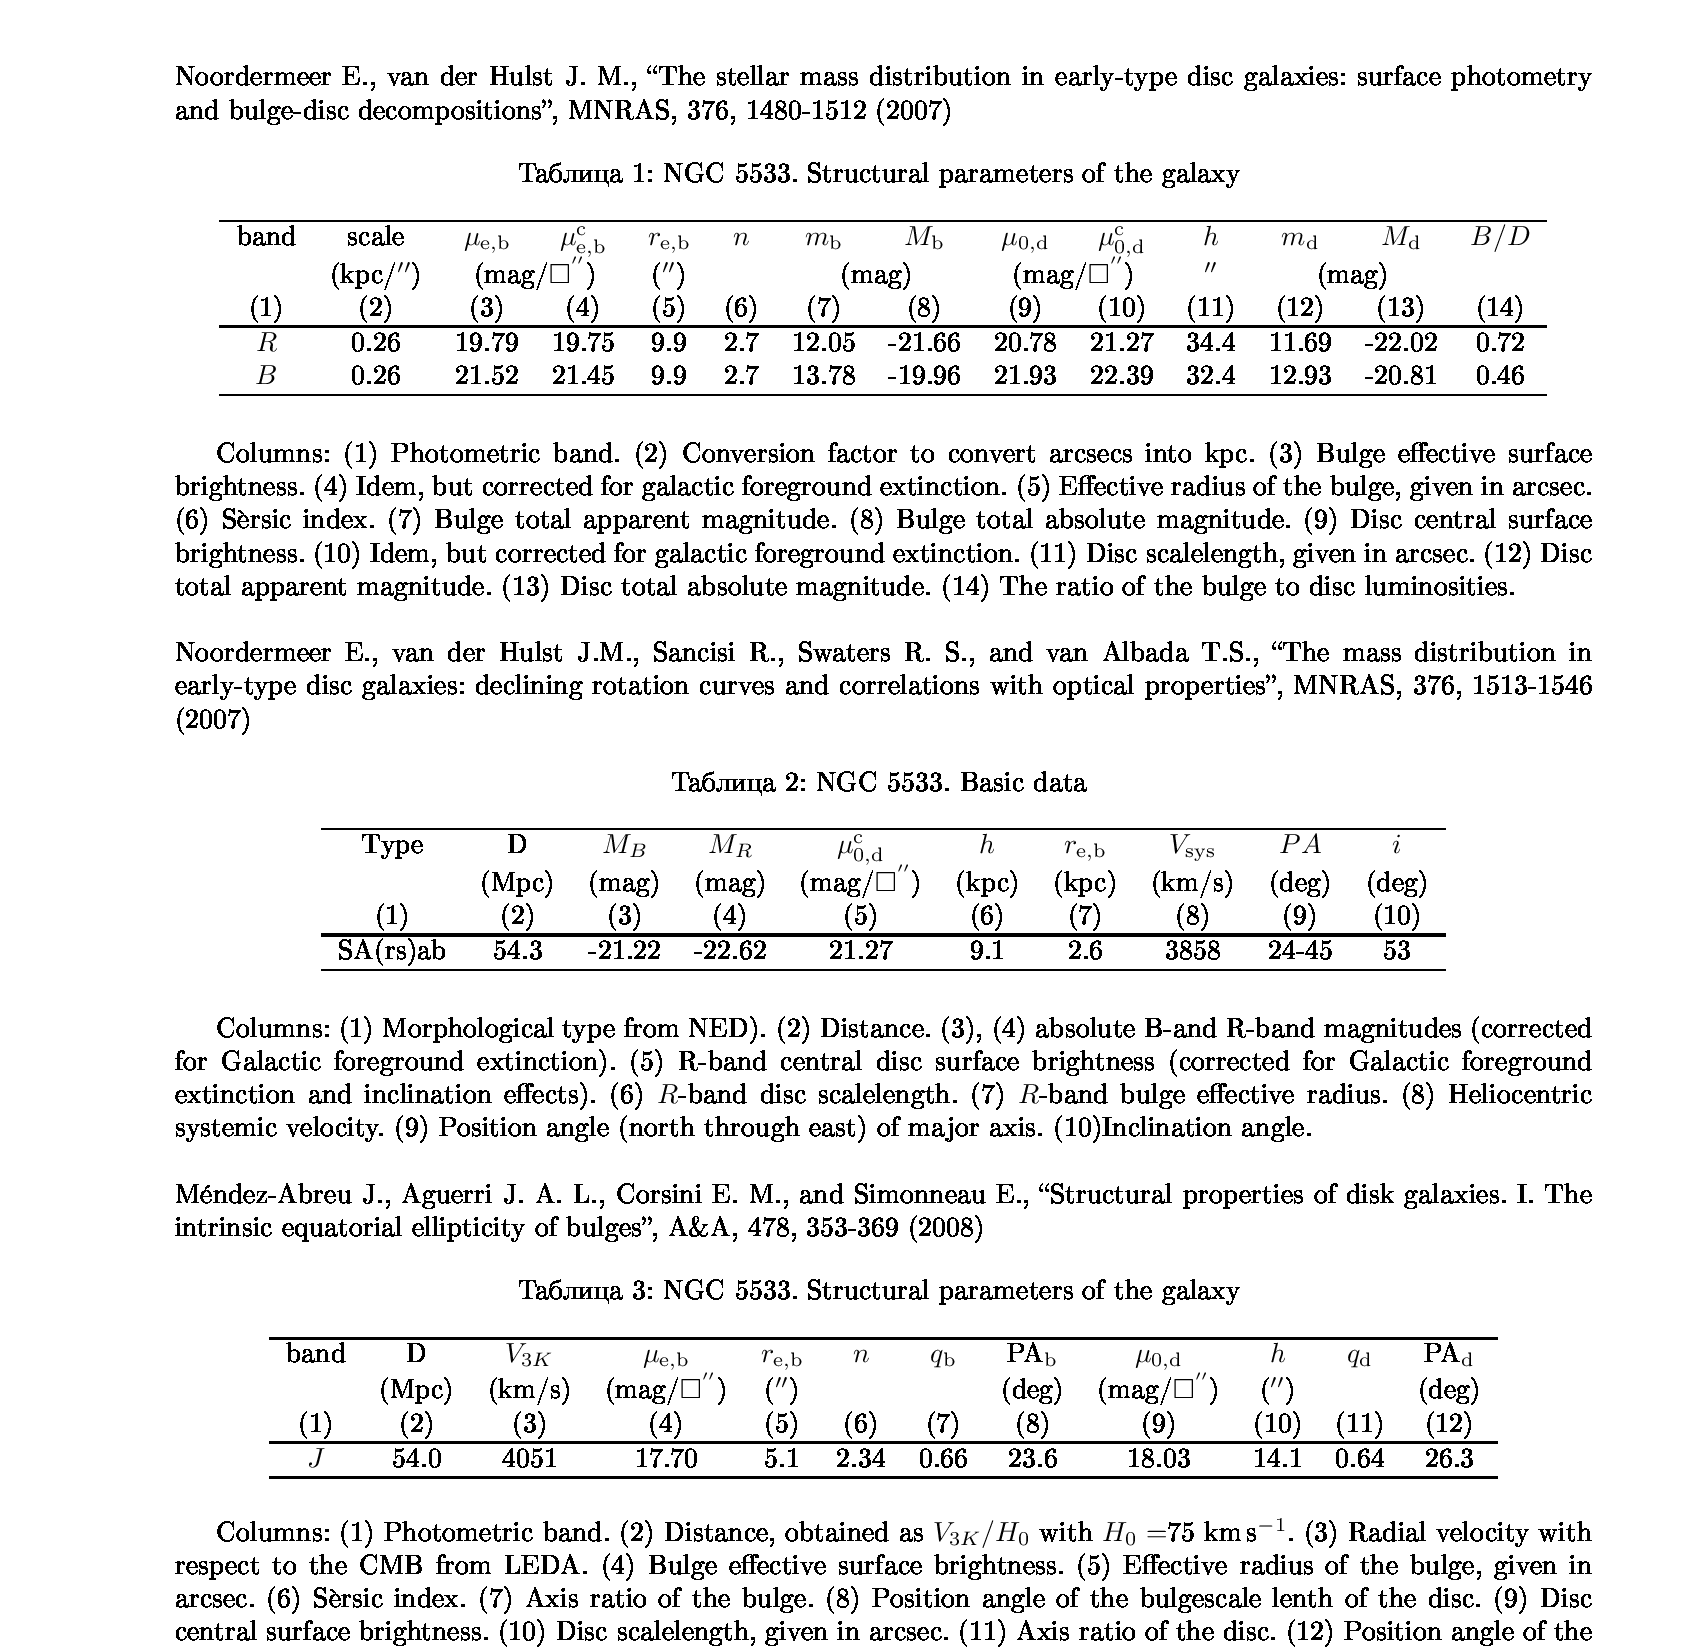

In [37]:
from wand.image import Image as WImage
img = WImage(filename='ngc5533.pdf', resolution=200)
img[:, 150:1800]

Фотометрия Ноордермеера:

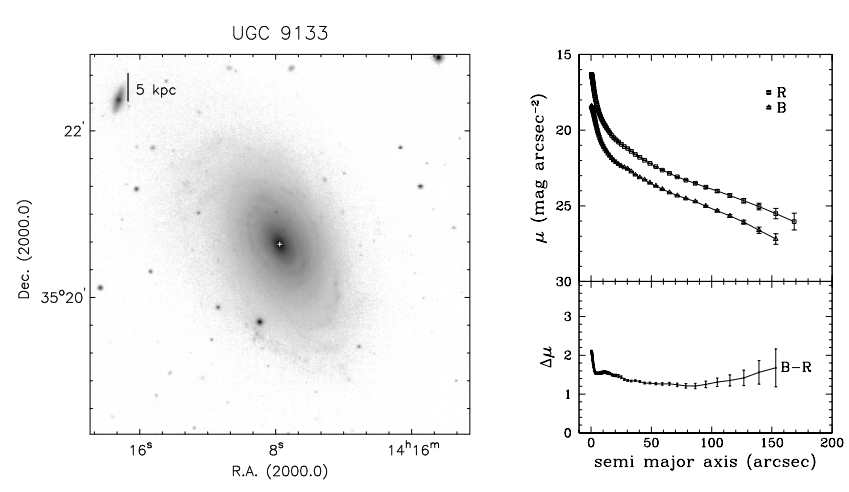

In [38]:
Image('noordermeer_data/n5533_photom.png')

Снятые R-данные:

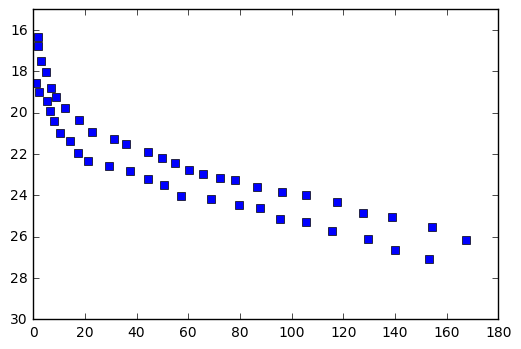

In [39]:
r_phot, mu_phot = zip(*np.loadtxt('noordermeer_data/n5533_noord_photoRB.dat', float, delimiter=','))

plt.plot(r_phot, mu_phot, 's')
plt.ylim(30, 15)
plt.show()

In [40]:
M_R = -22.02 #11.69 - это правильно? надо брать абсолютные? в дипломе были относительные, тут разница уже существенная
M_B = -20.81 #12.93

$$\log_{10}(M/L)=a_{\lambda} + b_{\lambda}\times Color$$

In [41]:
print 'Abs B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(M_B-M_R, 'B', 'B-R'), bell_mass_to_light(M_B-M_R, 'R', 'B-R'))
print 'Rel B : {:2.2f}; R: {:2.2f}.'.format(bell_mass_to_light(12.93-11.69, 'B', 'B-R'), bell_mass_to_light(12.93-11.69, 'R', 'B-R'))

Abs B : 2.34; R: 2.01.
Rel B : 2.52; R: 2.11.


Разницы почти нет, так что можно использовать что-то одно.

In [42]:
# R-band
r_eff_R = 9.9
mu_eff_R = 19.79 # уточнить это ли число
n_R = 2.7
mu0d_R = 20.78 # и тут тоже
h_disc_R = 34.4

mu_eff_Rc = 19.75 # уточнить это ли число
mu0d_Rc = 21.27 # и тут тоже

In [43]:
# B-band
r_eff_B = 9.9
mu_eff_B = 21.52 # уточнить это ли число
n_B = 2.7
mu0d_B = 21.93 # и тут тоже
h_disc_B = 32.4

mu_eff_Bc = 21.45 # уточнить это ли число
mu0d_Bc = 22.39 # и тут тоже

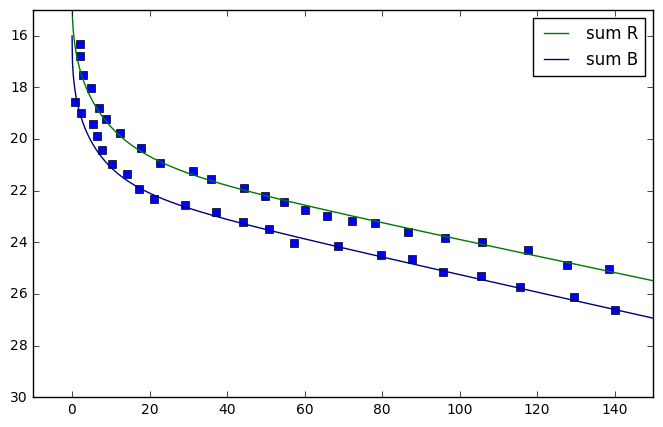

In [44]:
p_ = np.arange(0., 200., 0.1)

fig = plt.figure(figsize=[8, 5])
plt.plot(r_phot, mu_phot, 's')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_R, r_eff=r_eff_R, n=n_R) for l in p_], 
                              [mu_disc(l, mu0=mu0d_R, h=h_disc_R) for l in p_]), '-', label='sum R', color='#007700')
plt.plot(p_, total_mu_profile([mu_bulge(l, mu_eff=mu_eff_B, r_eff=r_eff_B, n=n_B) for l in p_], 
                              [mu_disc(l, mu0=mu0d_B, h=h_disc_B) for l in p_]), '-', label='sum B', color='#000077')
plt.xlim(-10, 150)
plt.ylim(30, 15)
plt.legend()
plt.show()

Похоже.

1.21 1.24


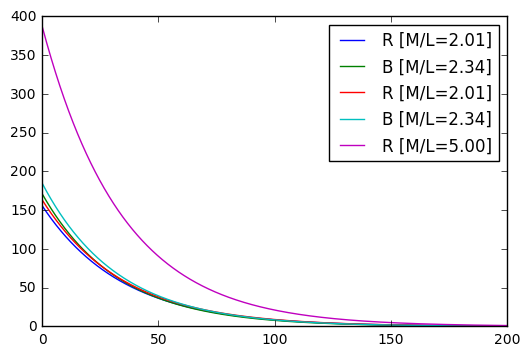

In [45]:
b_r_color = M_B-M_R

M_to_L_R = bell_mass_to_light(b_r_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_B = bell_mass_to_light(b_r_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_B, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

diploma_color = 12.93-11.69

M_to_L_Rc = bell_mass_to_light(diploma_color, 'R', 'B-R')
surf_R = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R') for l in p_]
plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))

M_to_L_Bc = bell_mass_to_light(diploma_color, 'B', 'B-R')
surf_B = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B') for l in p_]
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))

print b_r_color, diploma_color

surf_R_ = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=5., band='R') for l in p_]
plt.plot(p_, surf_R_, '-', label='R [M/L={:2.2f}]'.format(5.))

plt.legend()
plt.show()

Как и получалось - примерно 150~170.

In [46]:
all_photometry.append(('Noorder R', r_eff_R, mu_eff_Rc, n_R, mu0d_Rc, h_disc_R, M_to_L_Rc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=M_to_L_Rc, band='R')))
all_photometry.append(('Noorder B', r_eff_B, mu_eff_Bc, n_B, mu0d_Bc, h_disc_B, M_to_L_Bc, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=M_to_L_Bc, band='B')))

Méndez-Abreu фотометрия в $J$:

In [47]:
# J-band
r_eff_J = 5.1
mu_eff_J = 17.70
n_J = 2.34
mu0d_J = 18.03
h_disc_J = 14.1

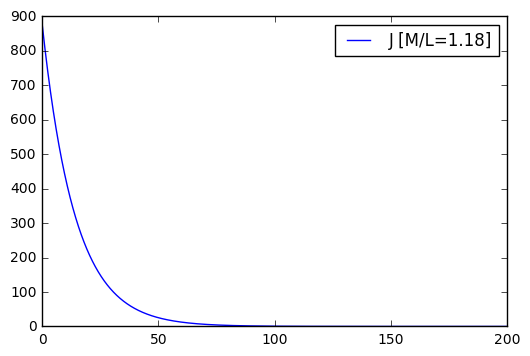

In [48]:
M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

plt.legend()
plt.show()

Получилось не то, что в дипломе - надо понять, почему.

TODO: понять почему отличается (M/L в дипломе другое)

In [49]:
all_photometry.append(('Mendez-Abreu J', r_eff_J, mu_eff_J, n_J, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

SDSS $r$ полоса из http://adsabs.harvard.edu/cgi-bin/bib_query?1996ApJS..103..363C :

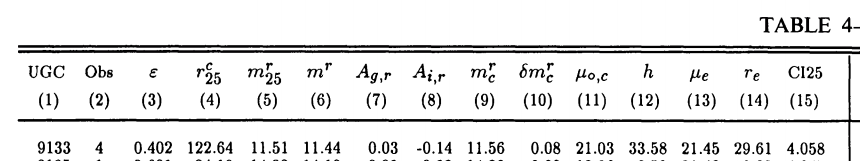

In [50]:
Image('r_data.png')

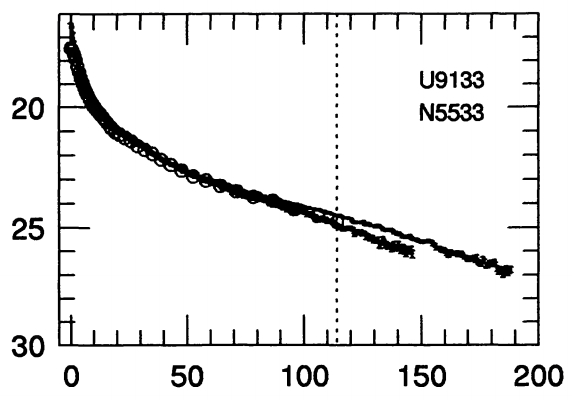

In [51]:
Image('r_photom.png')

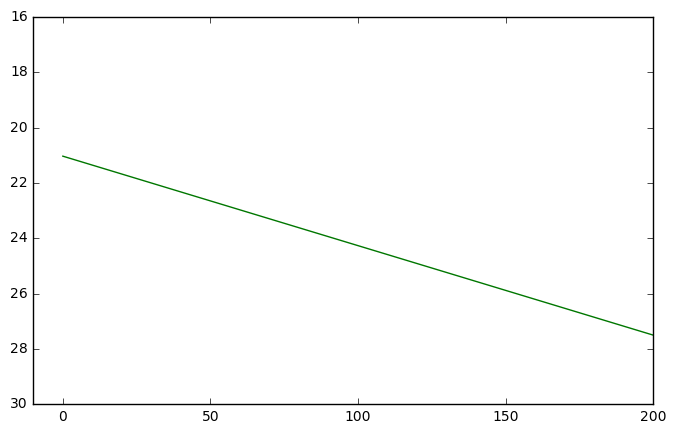

In [52]:
h = 33.58
mud = 21.03

fig = plt.figure(figsize=[8, 5])
plt.plot(p_, [mu_disc(l, mu0=mud, h=h) for l in p_], '-', color='#007700')

plt.xlim(-10, 200)
plt.ylim(30, 16)
plt.legend()
plt.show()

На взгляд похоже. Массовая модель - не можем посчитать, для этого надо знать цвет в SDSS полосе.

In [53]:
# M_to_L_r = bell_mass_to_light(b_r_color, 'r', 'B-R')
# surf_r = [surf_density(mu=mu_disc(l, mu0=mud, h=h), M_to_L=M_to_L_r, band='r') for l in p_]
# plt.plot(p_, surf_r, '-', label='r [M/L={:2.2f}]'.format(M_to_L_r))
# 
# plt.legend()
# plt.show()

Еще одно в $R$ http://adsabs.harvard.edu/cgi-bin/bib_query?1991A%26AS...91..469B :

In [54]:
# R-band
mu_eff_R2 = 17.64
mu0d_R2 = 20.73
h_disc_R2 = 11.4/scale

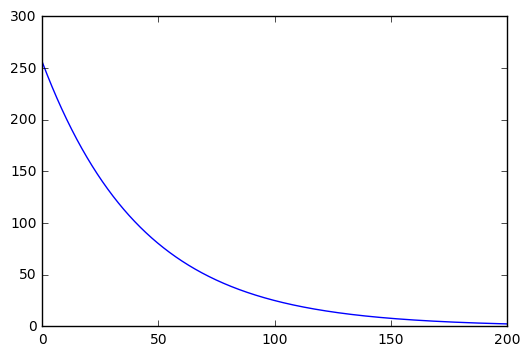

In [55]:
surf_R2 = [surf_density(mu=mu_disc(l, mu0=mu0d_R2, h=h_disc_R2), M_to_L=M_to_L_R, band='R') for l in p_]
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.show()

Больше, но не сильно отличается в целом.

In [56]:
all_photometry.append(('1991 R', None, mu_eff_R2, None, mu0d_R2, h_disc_R2, M_to_L_R, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_R2, h=h_disc_R2), M_to_L=M_to_L_R, band='R')))

$V$ полоса из http://adsabs.harvard.edu/cgi-bin/bib_query?1998AJ....116.1626B :

In [57]:
# V-band
r_eff_V = 19.6
mu_eff_V = 21.62
n_V = 4.0 #это не точно
mu0d_V = 22.43
h_disc_V = 40.70

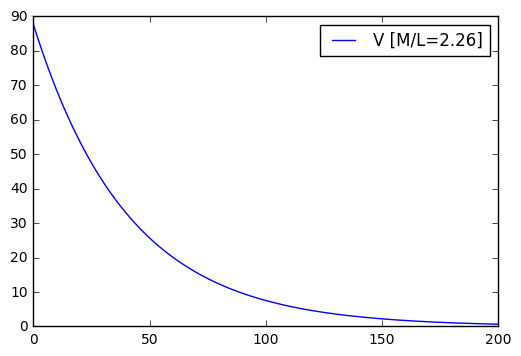

In [58]:
M_to_L_V = bell_mass_to_light(b_r_color, 'V', 'B-R')
surf_V = [surf_density(mu=mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L=M_to_L_V, band='V') for l in p_]
plt.plot(p_, surf_V, '-', label='V [M/L={:2.2f}]'.format(M_to_L_V))

plt.legend()
plt.show()

In [59]:
all_photometry.append(('1998 V', r_eff_V, mu_eff_V, n_V, mu0d_V, h_disc_V, M_to_L_V, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_V, h=h_disc_V), M_to_L=M_to_L_V, band='V')))

Бонус - данные из работы Сильченко 1998:

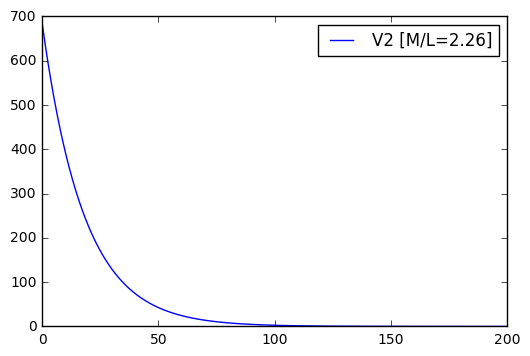

In [60]:
surf_V2 = [surf_density(mu=mu_disc(l, mu0=20.20, h=18.0), M_to_L=M_to_L_V, band='V') for l in p_]
plt.plot(p_, surf_V2, '-', label='V2 [M/L={:2.2f}]'.format(M_to_L_V))

plt.legend()
plt.show()

Тоже в пользу массивной говорит.

In [61]:
all_photometry.append(('Silchenko V', None, None, None, 20.20, 18.0, M_to_L_V, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=20.20, h=18.0), M_to_L=M_to_L_V, band='V')))

CALIFA $g$, $r$, $i$:

In [62]:
MUE_g =20.86990
Re_g =8.79792
n_g =3.3349
MU0_g =21.46726
hi_g =28.1701

MUE_r =20.0117
Re_r =8.88051
n_r =3.17403
MU0_r =20.7517
hi_r =28.0063


MUE_i =19.7457
Re_i =9.72462
n_i =3.20586
MU0_i =20.395
hi_i =28.0063

http://skyserver.sdss.org/dr12/en/tools/explore/summary.aspx?ra=214.032262&dec=35.343830 - отсюда возьму цвета

Посмотрим на все возможные калибровки с оценкой фотометрии из SDSS: (там правда есть предупреждение, что WARNING: This object's photometry may be unreliable. See the photometric flags below.)

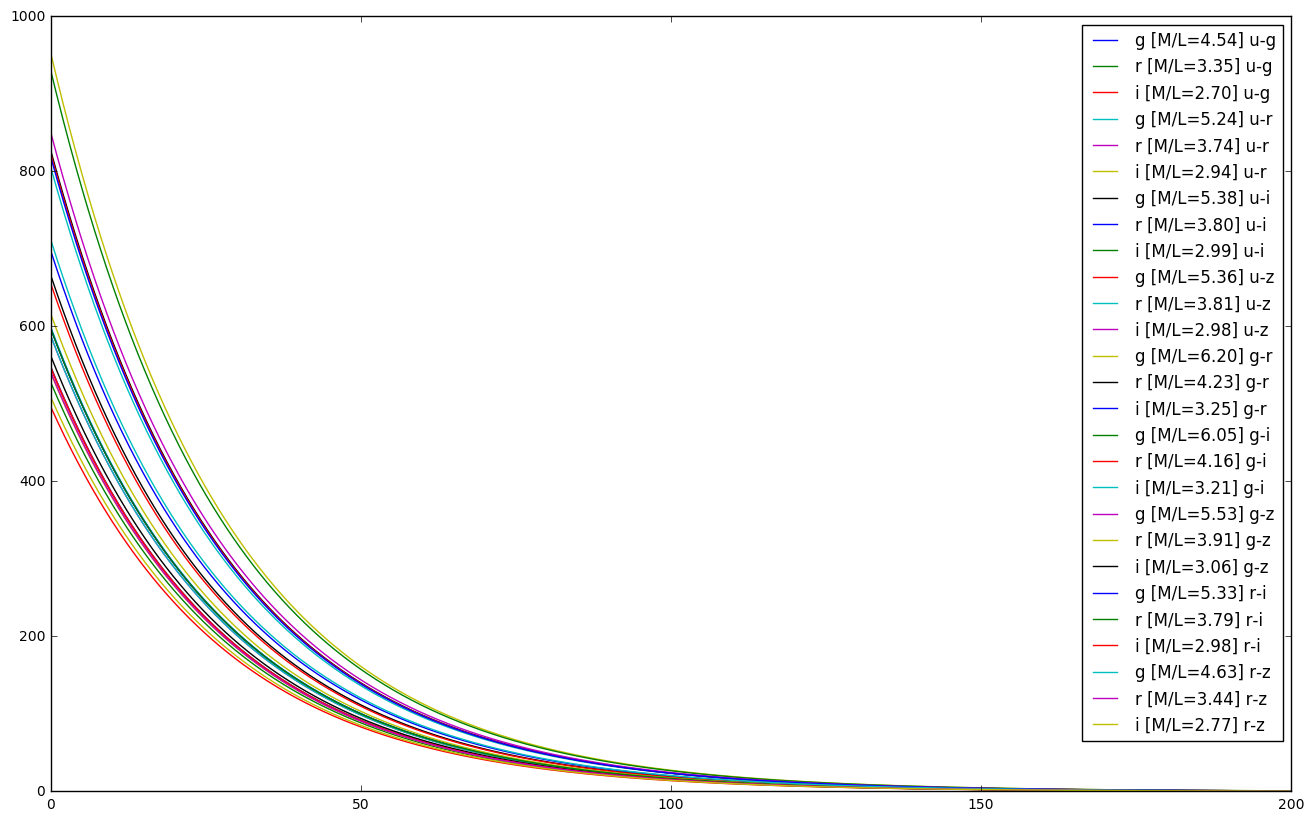

In [63]:
M_u = 14.43
M_g = 12.62
M_r = 11.77
M_i = 11.35
M_z = 11.03

fig = plt.figure(figsize=[16, 10])

for color_desc, color in [('u-g', M_u-M_g), ('u-r', M_u-M_r), ('u-i', M_u-M_i), ('u-z', M_u-M_z), 
                          ('g-r', M_g-M_r), ('g-i', M_g-M_i) , ('g-z', M_g-M_z), ('r-i', M_r-M_i), ('r-z', M_r-M_z)]:

    surf_g = [surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=bell_mass_to_light(color, 'g', color_desc), band='g') for l in p_]
    plt.plot(p_, surf_g, '-', label='g [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'g', color_desc), color_desc))

    surf_r = [surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=bell_mass_to_light(color, 'r', color_desc), band='r') for l in p_]
    plt.plot(p_, surf_r, '-', label='r [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'r', color_desc), color_desc))

    surf_i = [surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=bell_mass_to_light(color, 'i', color_desc), band='i') for l in p_]
    plt.plot(p_, surf_i, '-', label='i [M/L={:2.2f}] {}'.format(bell_mass_to_light(color, 'i', color_desc), color_desc))

plt.legend()
plt.show()

Видим, что все скорее к массивной фотометрии относятся.

Добавим для последнего цвета в таблицу:

In [64]:
all_photometry.append(('califa g', Re_g, MUE_g, n_g, MU0_g, hi_g, bell_mass_to_light(color, 'g', color_desc), 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_g, h=hi_g), M_to_L=bell_mass_to_light(color, 'g', color_desc), band='g')))

all_photometry.append(('califa r', Re_r, MUE_r, n_r, MU0_r, hi_r, bell_mass_to_light(color, 'r', color_desc), 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_r, h=hi_r), M_to_L=bell_mass_to_light(color, 'r', color_desc), band='r')))

all_photometry.append(('califa i', Re_i, MUE_i, n_i, MU0_i, hi_i, bell_mass_to_light(color, 'i', color_desc), 
                       lambda l: surf_density(mu=mu_disc(l, mu0=MU0_i, h=hi_i), M_to_L=bell_mass_to_light(color, 'i', color_desc), band='i')))

Итоговая картинка (обавим еще максимальный диск для двух случаев):

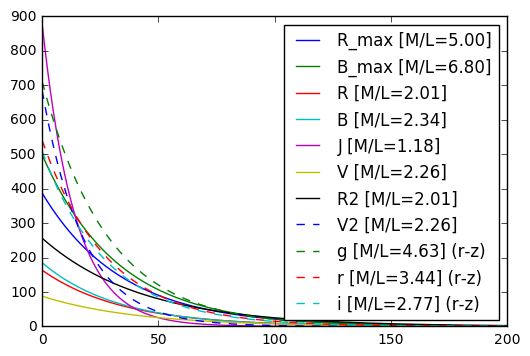

In [65]:
surf_R_max = [surf_density(mu=mu_disc(l, mu0=mu0d_Rc, h=h_disc_R), M_to_L=5., band='R') for l in p_]
plt.plot(p_, surf_R_max, '-', label='R_max [M/L={:2.2f}]'.format(5.))

surf_B_max = [surf_density(mu=mu_disc(l, mu0=mu0d_Bc, h=h_disc_B), M_to_L=6.8, band='B') for l in p_]
plt.plot(p_, surf_B_max, '-', label='B_max [M/L={:2.2f}]'.format(6.8))

plt.plot(p_, surf_R, '-', label='R [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_B, '-', label='B [M/L={:2.2f}]'.format(M_to_L_B))
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))
plt.plot(p_, surf_V, '-', label='V [M/L={:2.2f}]'.format(M_to_L_V))
plt.plot(p_, surf_R2, '-', label='R2 [M/L={:2.2f}]'.format(M_to_L_R))
plt.plot(p_, surf_V2, '--', label='V2 [M/L={:2.2f}]'.format(M_to_L_V))

plt.plot(p_, surf_g, '--', label='g [M/L={:2.2f}] (r-z)'.format(bell_mass_to_light(color, 'g', color_desc)))
plt.plot(p_, surf_r, '--', label='r [M/L={:2.2f}] (r-z)'.format(bell_mass_to_light(color, 'r', color_desc)))
plt.plot(p_, surf_i, '--', label='i [M/L={:2.2f}] (r-z)'.format(bell_mass_to_light(color, 'i', color_desc)))

plt.legend()
plt.show()

TODO: понять, почему больше, чем в дипломе - там было 328 для макс. диска.

Очень противоречиво всё - в первом случае примерно разделяется на два вида, а во втором случае все возможные промежуточные значения тоже. Не ясно, что делать - брать такой разброс.

TODO: что делать?

In [66]:
from tabulate import tabulate
import pandas as pd

df = pd.DataFrame(data=all_photometry, columns=['Name', 'r_eff', 'mu_eff', 'n', 'mu0_d', 'h_disc', 'M/L', 'surf'])
df['M/L'] = df['M/L'].apply(lambda l: '%2.2f'%l)
print tabulate(df, headers='keys', tablefmt='psql')

+----+----------------+-----------+----------+-----------+---------+----------+-------+-------------------------------------------+
|    | Name           |     r_eff |   mu_eff |         n |   mu0_d |   h_disc |   M/L | surf                                      |
|----+----------------+-----------+----------+-----------+---------+----------+-------+-------------------------------------------|
|  0 | Noorder R      |   9.9     |  19.75   |   2.7     | 21.27   |  34.4    |  2.11 | <function <lambda> at 0x000000000ADF3E48> |
|  1 | Noorder B      |   9.9     |  21.45   |   2.7     | 22.39   |  32.4    |  2.52 | <function <lambda> at 0x000000000B2CF748> |
|  2 | Mendez-Abreu J |   5.1     |  17.7    |   2.34    | 18.03   |  14.1    |  1.18 | <function <lambda> at 0x000000000B2CF6D8> |
|  3 | 1991 R         | nan       |  17.64   | nan       | 20.73   |  43.0189 |  2.01 | <function <lambda> at 0x000000000AF434A8> |
|  4 | 1998 V         |  19.6     |  21.62   |   4       | 22.43   |  40.7  

## Зоны звездообразования


TODO: найти еще данные и сделать обоснованно

GALEX http://gsss.stsci.edu/webservices/vo/CatalogSearch.aspx?RA=214.032262&DEC=35.343830&SR=.002&FORMAT=HTML&CAT=GALEX там есть маааленькие картинки, но я не смог их посмотреть нормально

Оценка из SDSS изображения:

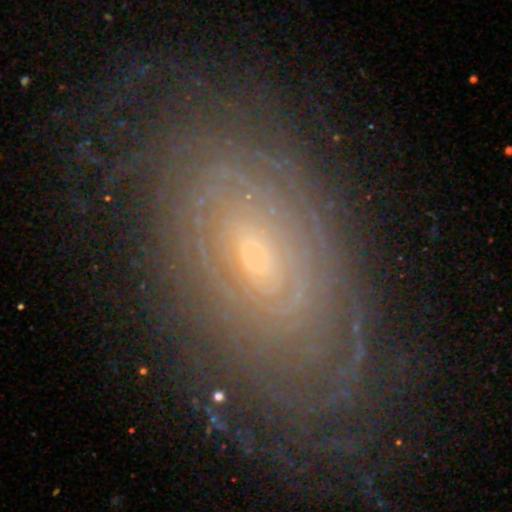

In [67]:
Image('ngc5533_SDSS.jpeg', width=400)

In [68]:
# несколько оценок протяженности
print 0.396*487/2
print 225*0.396
print 220*0.396

96.426
89.1
87.12


(0, 200)

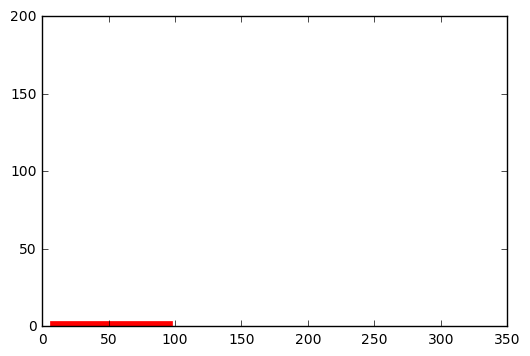

In [69]:
def plot_SF(ax):
    ax.plot([10., 95.], [0., 0.], '-', lw=7., color='red')
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

## Неустойчивость

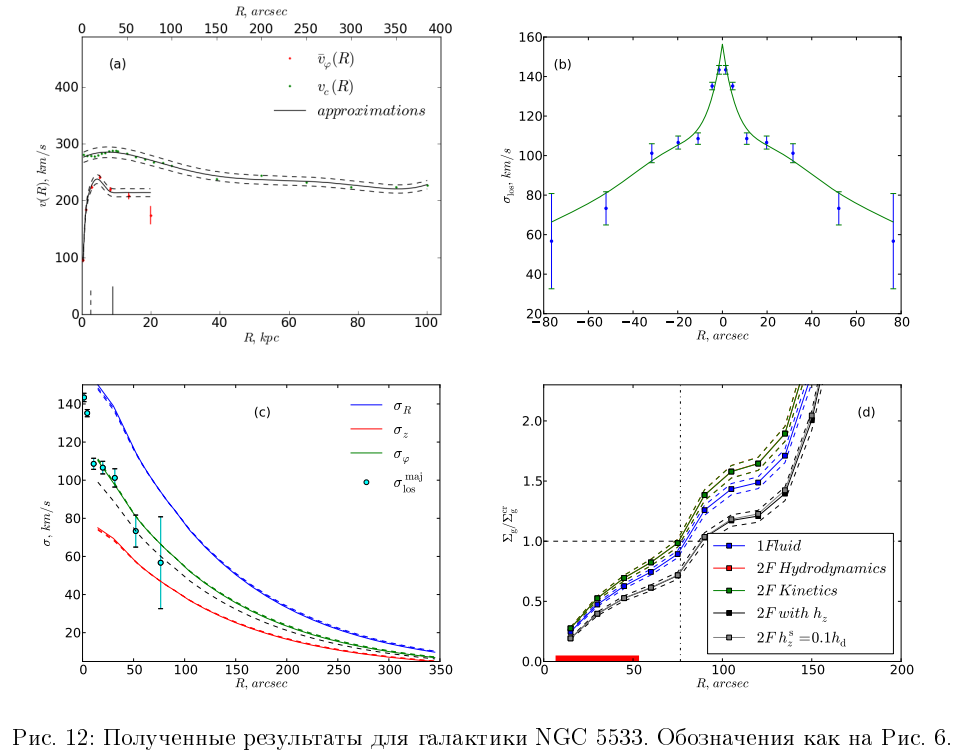

In [70]:
Image('diplom_result.png')

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [71]:
sound_vel = 6.  #скорость звука в газе, км/с
data_lim = max(max(r_sig_ma), max(r_sig_mi)) #где заканчиваются данные

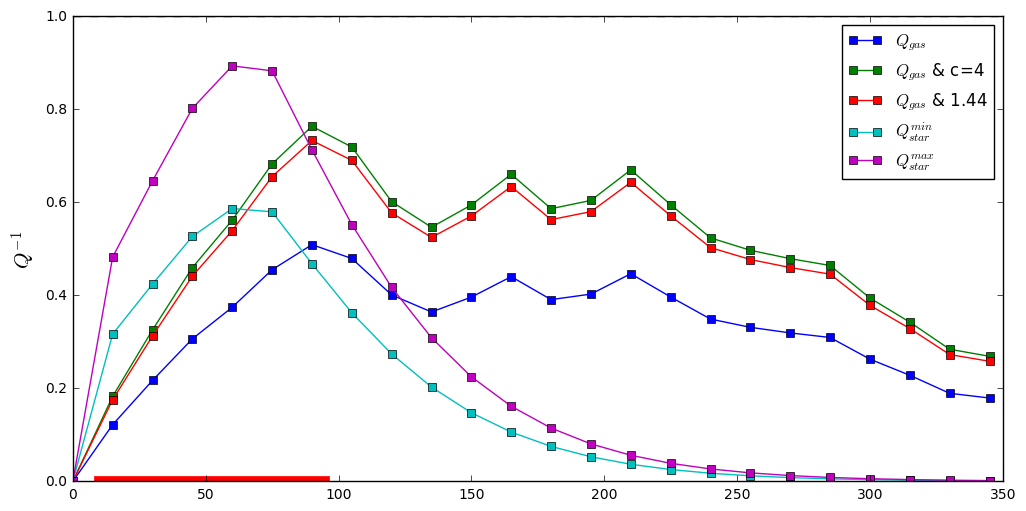

In [72]:
fig = plt.figure(figsize=[12, 6])
gd_data = zip(r_g_dens, gas_dens)

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=1.44*l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & 1.44')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, 5., 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens), 
                        [surf_density(l_, 5., 'R') for l_ in [mu_disc(ll, mu0=mu0d_R, h=h_disc_R) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.show()

Похоже на диплом.

**НЕ ИСПРАВЛЕНО ЗА 1.6!** Т.к. тут еще сравнение с звездным Q.

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

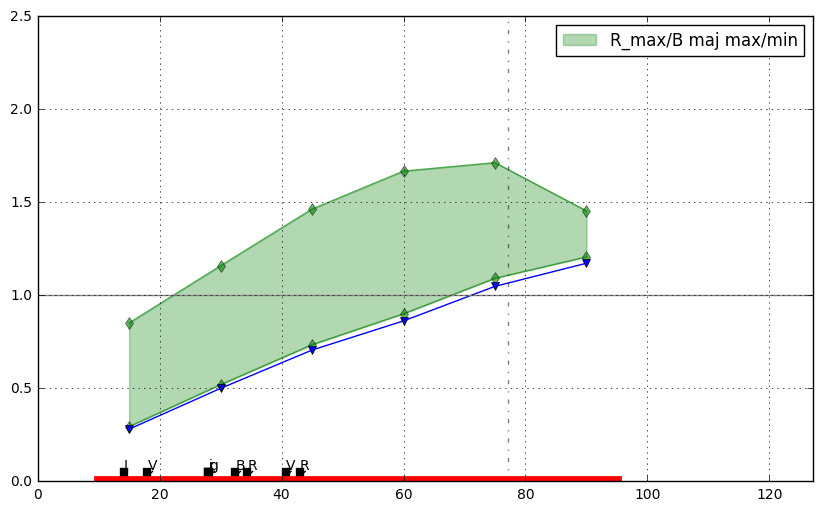

In [73]:
total_gas_data = zip(r_g_dens, map(lambda l: 1.44*l, gas_dens))[1:7]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]


fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max/B maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.show()

## Картинка 

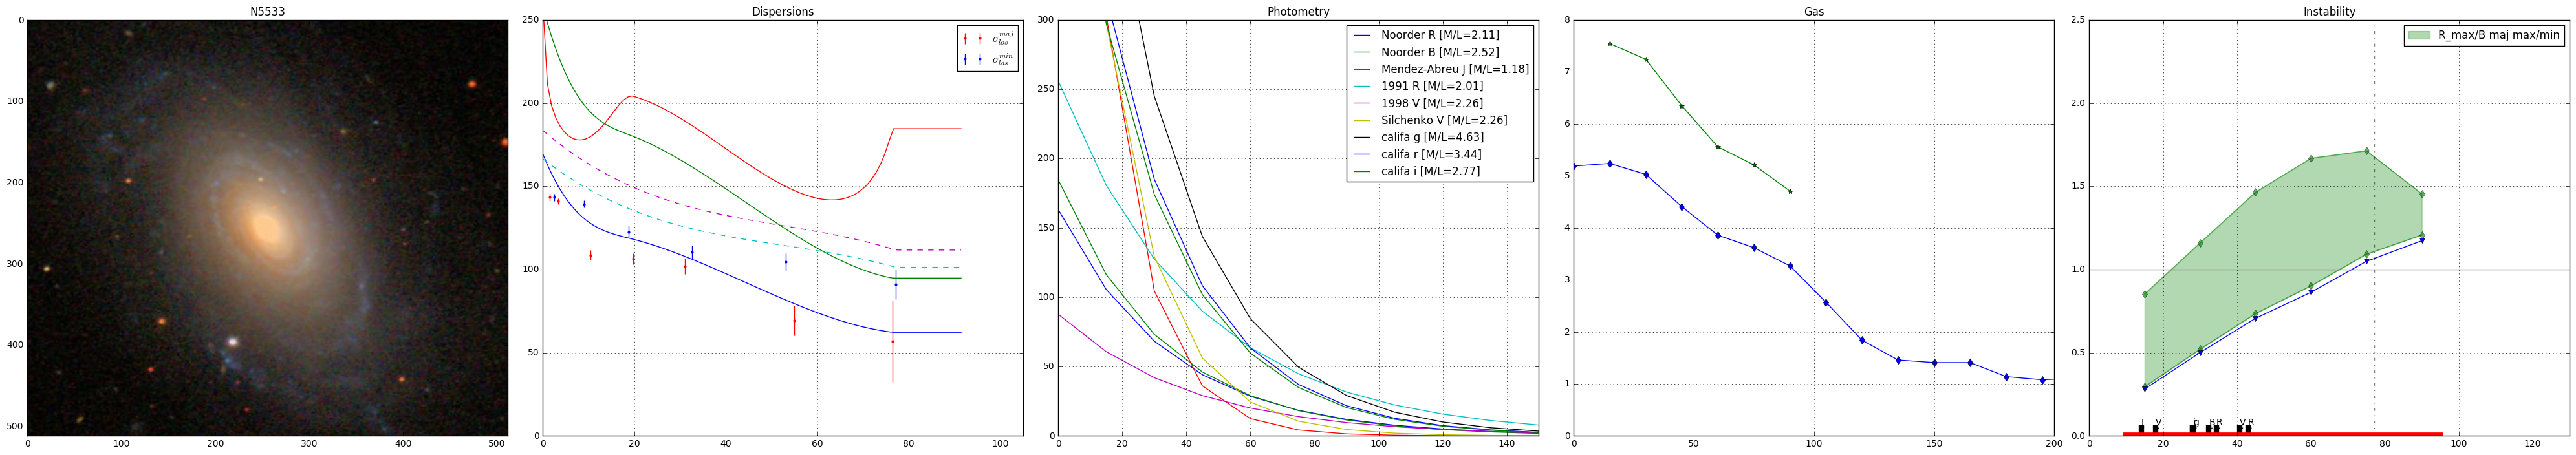

In [74]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('ngc5533_SDSS.jpeg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='b', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_g_dens, gas_dens, 'd-')
    axes[3].plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], '*-')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    
    #change this
    plot_2f_vs_1f(ax=axes[4], total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='R_max/B maj max/min')

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight')
    plt.show()
    
save_model_plot(summary_imgs_path)

# End

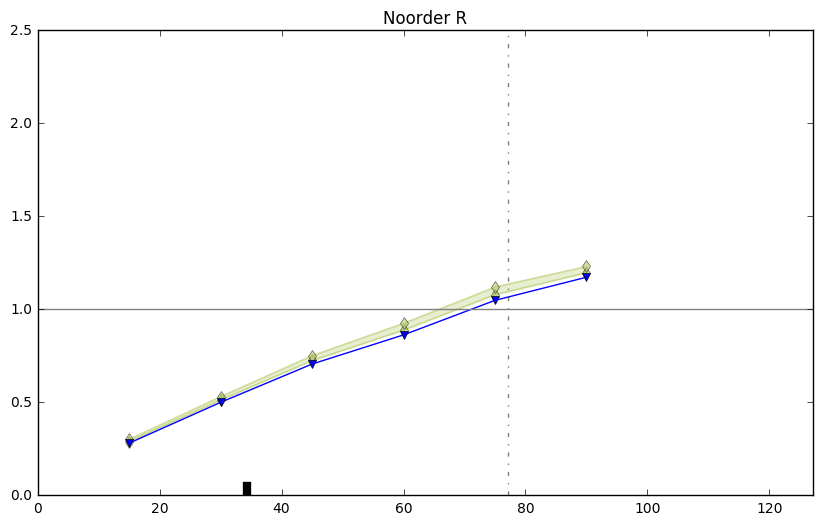

In [75]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [76]:
anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [77]:
from IPython.display import HTML
HTML(anim.to_html5_video())

Другие дисперсии:

r = 15.00; gas_d = 5.24; epicycl = 97.13; sig = 109.92; star_d = 393.10
	Qs = 1.87; Qg = 8.19; Qeff = 1.71
r = 30.00; gas_d = 5.03; epicycl = 52.37; sig = 98.42; star_d = 254.18
	Qs = 1.40; Qg = 4.60; Qeff = 1.26
r = 45.00; gas_d = 4.41; epicycl = 32.53; sig = 82.52; star_d = 164.35
	Qs = 1.13; Qg = 3.26; Qeff = 1.01
r = 60.00; gas_d = 3.86; epicycl = 23.31; sig = 66.86; star_d = 106.27
	Qs = 1.01; Qg = 2.67; Qeff = 0.89
r = 75.00; gas_d = 3.62; epicycl = 17.99; sig = 56.70; star_d = 68.71
	Qs = 1.02; Qg = 2.20; Qeff = 0.88
r = 90.00; gas_d = 3.27; epicycl = 14.53; sig = 56.22; star_d = 44.43
	Qs = 1.27; Qg = 1.96; Qeff = 1.05


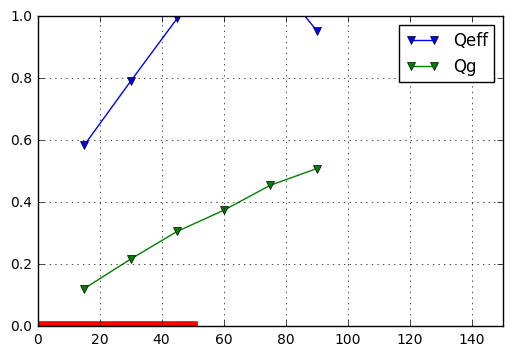

In [58]:
gas_data = zip(r_g_dens, gas_dens)[1:7] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_R, h=h_disc_R), 5., 'R'), verbose=True))

plt.plot(r_g_dens[1:7], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[1:7], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

r = 15.00; gas_d = 5.24; epicycl = 97.13; sig = 109.92; star_d = 302.88
	Qs = 2.43; Qg = 8.19; Qeff = 2.21
r = 30.00; gas_d = 5.03; epicycl = 52.37; sig = 98.42; star_d = 104.54
	Qs = 3.40; Qg = 4.60; Qeff = 2.93
r = 45.00; gas_d = 4.41; epicycl = 32.53; sig = 82.52; star_d = 36.08
	Qs = 5.13; Qg = 3.26; Qeff = 2.98
r = 60.00; gas_d = 3.86; epicycl = 23.31; sig = 66.86; star_d = 12.45
	Qs = 8.62; Qg = 2.67; Qeff = 2.53
r = 75.00; gas_d = 3.62; epicycl = 17.99; sig = 56.70; star_d = 4.30
	Qs = 16.35; Qg = 2.20; Qeff = 2.14
r = 90.00; gas_d = 3.27; epicycl = 14.53; sig = 56.22; star_d = 1.48
	Qs = 37.92; Qg = 1.96; Qeff = 1.94


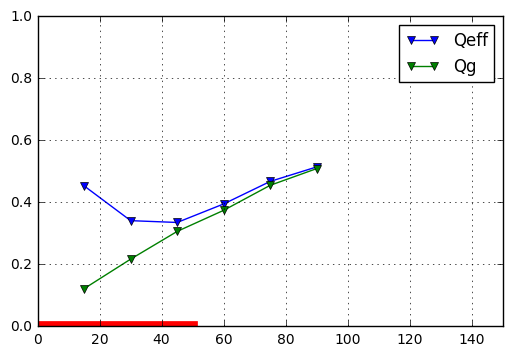

In [59]:
gas_data = zip(r_g_dens, gas_dens)[1:7] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L_J, 'J'), verbose=True))

plt.plot(r_g_dens[1:7], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[1:7], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

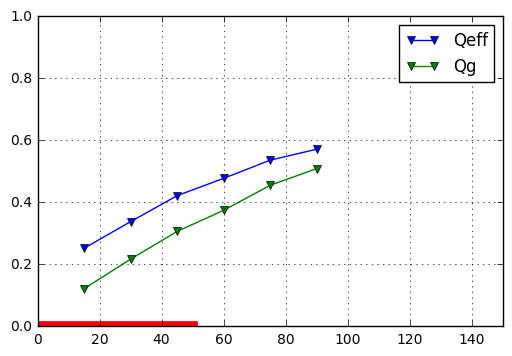

In [60]:
gas_data = zip(r_g_dens, gas_dens)[1:7] #в нуле не берем
invQg, invQs, invQeff = zip(*get_invQeff_from_data(gas_data=gas_data, 
                                epicycl=epicyclicFreq_real, 
                                gas_approx=spl_gas,
                                sound_vel=sound_vel, 
                                scale=scale,
                                sigma=sig_R_min,
                                star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_B, h=h_disc_B), M_to_L_B, 'B')))

plt.plot(r_g_dens[1:7], invQeff, 'v-', label='Qeff')
plt.plot(r_g_dens[1:7], invQg, 'v-', label='Qg')
plt.ylim(0., 1.)
plt.xlim(0., 150.)
plot_SF(plt.gca())
plt.legend()
plt.grid()
plt.show()

## Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

## Эксперименты

In [61]:
# %install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.12 64bit [MSC v.1500 64 bit (AMD64)]
IPython 5.1.0
OS Windows 7 6.1.7601 SP1
numpy 1.11.2
scipy 0.18.1
matplotlib 1.5.1
Tue Nov 15 12:12:49 2016 RTZ 2 (зима)